In [8]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

nsample = 20
x = np.linspace(0, 10, nsample)
x

array([  0.        ,   0.52631579,   1.05263158,   1.57894737,
         2.10526316,   2.63157895,   3.15789474,   3.68421053,
         4.21052632,   4.73684211,   5.26315789,   5.78947368,
         6.31578947,   6.84210526,   7.36842105,   7.89473684,
         8.42105263,   8.94736842,   9.47368421,  10.        ])

#### 一元线性回归

In [9]:
X = sm.add_constant(x)
X

array([[  1.        ,   0.        ],
       [  1.        ,   0.52631579],
       [  1.        ,   1.05263158],
       [  1.        ,   1.57894737],
       [  1.        ,   2.10526316],
       [  1.        ,   2.63157895],
       [  1.        ,   3.15789474],
       [  1.        ,   3.68421053],
       [  1.        ,   4.21052632],
       [  1.        ,   4.73684211],
       [  1.        ,   5.26315789],
       [  1.        ,   5.78947368],
       [  1.        ,   6.31578947],
       [  1.        ,   6.84210526],
       [  1.        ,   7.36842105],
       [  1.        ,   7.89473684],
       [  1.        ,   8.42105263],
       [  1.        ,   8.94736842],
       [  1.        ,   9.47368421],
       [  1.        ,  10.        ]])

In [11]:
#β0,β1分别设置成2,5
beta = np.array([2, 5])
beta

array([2, 5])

In [13]:
#误差项
e = np.random.normal(size=nsample)
e

array([-1.87955777, -0.49196542, -0.53259826, -0.10675137,  1.17508727,
       -1.02293335,  1.75717793, -1.12456907, -0.64294355,  0.44920794,
       -1.20471093,  0.02588779, -0.69216987,  1.23018605,  0.59180637,
        1.03269883,  0.16712902,  2.06599762, -2.06133608, -0.12899139])

In [14]:
#实际值y
y = np.dot(X, beta) + e
y

array([  0.12044223,   4.13961353,   6.73055964,   9.78798547,
        13.70140306,  14.13496139,  19.54665161,  19.29648356,
        22.40968802,  26.13341847,  27.11107855,  30.97325622,
        32.8867775 ,  37.44071236,  39.43391164,  42.50638304,
        44.27239218,  48.80283972,  47.30708497,  51.87100861])

In [15]:
#最小二乘法
model = sm.OLS(y,X)

In [16]:
#拟合数据
res = model.fit()

In [18]:
#回归系数
res.params

array([ 1.49524076,  5.08701837])

In [20]:
#全部结果
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3668.
Date:                Thu, 01 Mar 2018   Prob (F-statistic):           2.94e-22
Time:                        18:07:03   Log-Likelihood:                -29.947
No. Observations:                  20   AIC:                             63.89
Df Residuals:                      18   BIC:                             65.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4952      0.491      3.043      0.007       0.463       2.527
x1             5.0870      0.084     60.560      0.000       4.911       5.263
==============================================================================
Omnibus:                        0.016   Durbin-Watson:                   2.569
Prob(Omnibus):                  0.992   Jarque-Bera (JB):                0.107
Skew:                          -0.009   Prob(JB):                        0.948
Kurtosis:                       2.641   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#拟合的估计值
y_ = res.fittedvalues
y_

array([  1.49524076,   4.17261885,   6.84999693,   9.52737502,
        12.20475311,  14.8821312 ,  17.55950928,  20.23688737,
        22.91426546,  25.59164354,  28.26902163,  30.94639972,
        33.62377781,  36.30115589,  38.97853398,  41.65591207,
        44.33329015,  47.01066824,  49.68804633,  52.36542442])

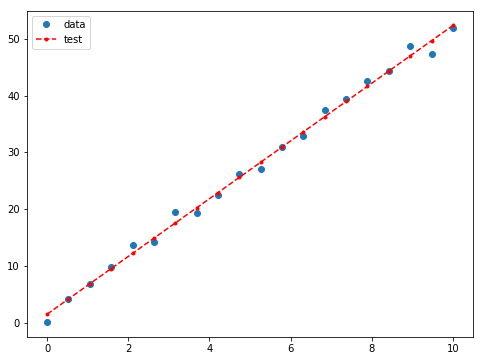

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')#原始数据
ax.plot(x, y_, 'r--.',label='test')#拟合数据
ax.legend(loc='best')
plt.show()

#### 高阶回归

In [31]:
#Y=5+2⋅X+3⋅X^2
 
nsample = 50
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))
X = sm.add_constant(X)

In [32]:
beta = np.array([5, 2, 3])
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e
model = sm.OLS(y,X)
results = model.fit()
results.params

array([ 4.93210623,  2.16604081,  2.97682135])

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.576e+05
Date:                Thu, 01 Mar 2018   Prob (F-statistic):           5.19e-99
Time:                        18:20:26   Log-Likelihood:                -58.847
No. Observations:                  50   AIC:                             123.7
Df Residuals:                      47   BIC:                             129.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9321      0.330     14.935      0.000       4.268       5.596
x1             2.1660      0.153     14.182      0.000       1.859       2.473
x2             2.9768      0.015    201.548      0.000       2.947       3.007
==============================================================================
Omnibus:                        3.204   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                1.916
Skew:                          -0.232   Prob(JB):                        0.384
Kurtosis:                       2.161   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

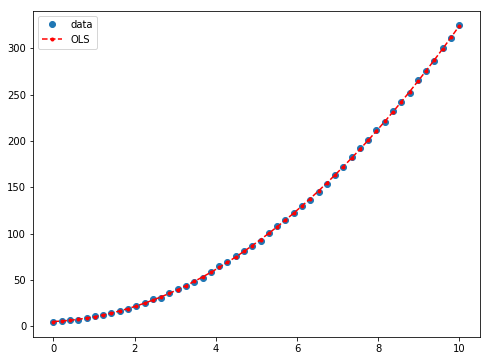

In [34]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')
plt.show()

#### 分类变量

假设分类变量有4个取值（a,b,c）,比如考试成绩有3个等级。那么a就是（1,0,0），b（0,1,0），c(0,0,1),这个时候就需要3个系数β0,β1,β2，也就是β0x0+β1x1+β2x2

In [38]:
nsample = 50
groups = np.zeros(nsample,int)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [39]:
groups[20:40] = 1
groups[40:] = 2
dummy = sm.categorical(groups, drop=True)
dummy

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.

In [43]:
#Y=5+2X+3Z1+6⋅Z2+9⋅Z3.
 
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, dummy))
X = sm.add_constant(X)
beta = [5, 2, 3, 6, 9]
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e
result = sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3580.
Date:                Thu, 01 Mar 2018   Prob (F-statistic):           1.69e-54
Time:                        18:27:14   Log-Likelihood:                -65.615
No. Observations:                  50   AIC:                             139.2
Df Residuals:                      46   BIC:                             146.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4962      0.531     16.002      0.000       7.427       9.565
x1             1.9634      0.061     32.140      0.000       1.840       2.086
x2            -0.3058      0.337     -0.908      0.368      -0.984       0.372
x3             3.0618      0.281     10.881      0.000       2.495       3.628
x4             5.7402      0.634      9.055      0.000       4.464       7.016
==============================================================================
Omnibus:                        2.756   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                2.120
Skew:                           0.502   Prob(JB):                        0.347
Kurtosis:                       3.103   Cond. No.                     1.28e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.16e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

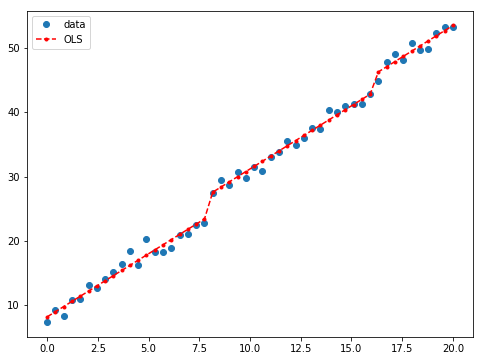

In [44]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, result.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')
plt.show()